# Harmonic Oscillator

The harmonic oscillator is certainly one of the working horses of physics. In qunatum mechanics, it resembles to be a good model for the motion of two bound atoms, i.e. bond vibrations, which are of relevance for condensed matter physics.

In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

As compared to the particle in a box, we have to change the potential in the Hamilton operator to solve the harmonic oscillator. The potential energy of the harmonic oscillator is given as

\begin{equation}
V(x)=\frac{k}{2}x^2
\end{equation}


where $k$ is the spring constant. For an atomic bond between carbon and oxygen, for example, the spring constant corresponds to $k=396$ N/m.


![Harmonic Potential](harmonic_potential.png)




The C=O bond has a bond length of $x_{0}=1.229$, so we do not have to look at a large domain. A region of $L=1$ provides already an energy change by 3 eV. 

## Definition of the problem

Before we start, we need to define some quantities:

* we will study a domain of L=1 Angström
* we will use N=1001 points for our $x_{i}$
* the spring constant shall be $k=396$ N/m
* we will use the mass of the carbon atom

In [117]:
# define some useful constants
hbar=1.678e-35 # joule seconds
m_c=1.998467052e-26 # carbon atom mass in kg
m_o=2.657e-26 # oxygen mass in kg
m=m_c*m_o/(m_c+m_o)
N=1001
k=396  # spring constant of the C=O bond N/m

L= 0.5e-10 #m

x = np.linspace(-L/2, L/2, N)
dx = x[1] - x[0]

### Potential energy

In [141]:
# potential energy for the harmonic oscillator
U_vec = 0.5*k*x**2

# potential energy is only on the diagonal, no deritvative
U = diags([U_vec], [0])

### Kinetic energy

In [134]:
# T is the finite difference2 representation of the second derivative in the kinetic energy
T = -hbar**2*diags([-2., 1., 1.], [0,-1, 1], shape=(N, N))/dx**2/2/m

An finally the total Hamilton operator matrix again.

In [135]:
# Sum of kinetic and potential energy
H = T + U

### Solution

In [139]:
# diagonalize the matrix and take the first n eigenvalues and eigenvectors
n=10
vals, vecs = eigsh(H, k=n , which='SM')

### Plotting

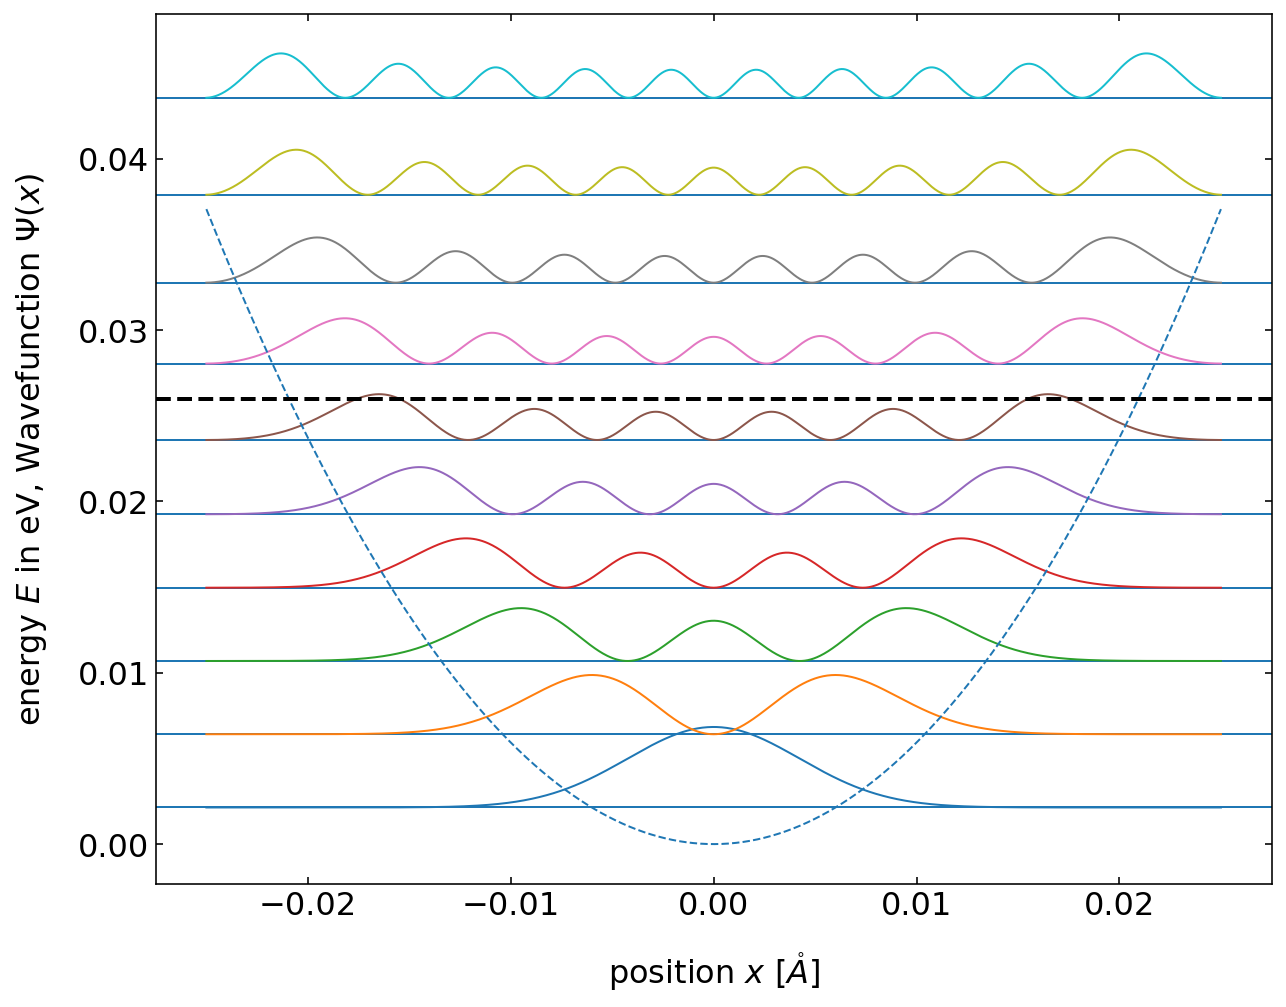

In [140]:
# define some scaling to make a nice plot
scale=1e9 # position scale
escale=6.242e18 # energy scale in eV
psiscale=1 # wavefunction scale 

plt.figure(figsize=(10,8))

for k in range(n):
    vec = vecs[:, k]
    mag = np.sqrt(np.dot(vecs[:, k],vecs[:, k]))
    vec = vec/mag
    plt.axhline(y=vals[k]*escale)
    plt.plot(x*scale, psiscale*np.abs(vec)**2+vals[k]*escale, label=r"$n=%i$"%k)

plt.plot(x*scale,UU*escale,'--')
plt.xlabel(r"position $x$ [$\mathring{A}$]")
plt.ylabel(r"energy $E$ in eV, Wavefunction $\Psi(x)$")
plt.axhline(y=0.026,color='k',ls='--',lw=2)
#plt.ylim(0,0.4)
plt.show()

The diagram above, shows that the energy values in the harmonic oscillator model are equally spaced. The horizontal dashed line corresponds to the thermal energy at 300 K temperature ($E_{th}=0.026$ eV). The bond length changes $x$ are pretty small as compared to the actual bond length.